In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow
from tensorflow import keras
from keras.models import Sequential
from keras.layers import  Dense, Flatten, Conv2D, MaxPooling2D,Dropout
from keras.datasets import cifar10

In [ ]:
(x_train,y_train),(x_test,y_test)= cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [ ]:
x_train= x_train.astype('float32')/255
x_test= x_test.astype('float32')/255

In [ ]:
x_train.shape

(50000, 32, 32, 3)

In [ ]:
def create_model():
    model= Sequential()
    model.add(Conv2D(32,(3,3), activation='relu', input_shape=(32,32,3)))
    model.add(MaxPooling2D(2,2))
    model.add(Conv2D(32,(3,3), activation='relu'))
    model.add(MaxPooling2D(2,2))
    model.add(Conv2D(64,(3,3), activation='relu'))
    model.add(MaxPooling2D(2,2))
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax'))
    return model

In [ ]:
model=create_model()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(loss='sparse_categorical_crossentropy', optimizer= 'adam', metrics=['accuracy'])

In [ ]:
history= model.fit(x_train, y_train,validation_data=(x_test,y_test), epochs=100, batch_size=38)

Epoch 1/100
1316/1316 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.2618 - loss: 1.9598 - val_accuracy: 0.4982 - val_loss: 1.4087
Epoch 2/100
1316/1316 ━━━━━━━━━━━━━━━━━━━━ 14s 4ms/step - accuracy: 0.4551 - loss: 1.4926 - val_accuracy: 0.5117 - val_loss: 1.3697
Epoch 3/100
1316/1316 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.5193 - loss: 1.3454 - val_accuracy: 0.5667 - val_loss: 1.2024
Epoch 4/100
1316/1316 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.5553 - loss: 1.2608 - val_accuracy: 0.6015 - val_loss: 1.1214
Epoch 5/100
1316/1316 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.5861 - loss: 1.1763 - val_accuracy: 0.6245 - val_loss: 1.0464
Epoch 6/100
1316/1316 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.6034 - loss: 1.1249 - val_accuracy: 0.6343 - val_loss: 1.0355
Epoch 7/100
1316/1316 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.6220 - loss: 1.0758 - val_accuracy: 0.6447 - val_loss: 1.0289
Epoch 8/100
1316/1316 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.6380 - los

In [ ]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

<Figure size 640x480 with 0 Axes>

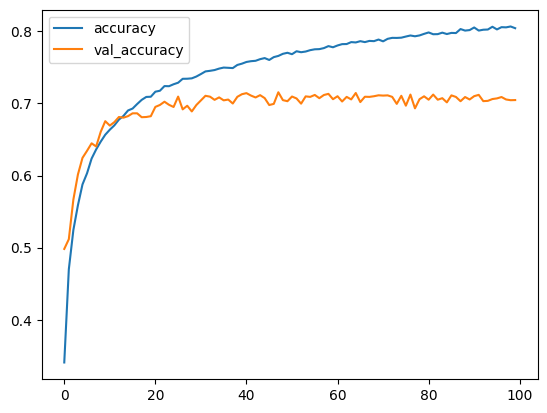

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['accuracy','val_accuracy'])
plt.figure()

<Figure size 640x480 with 0 Axes>

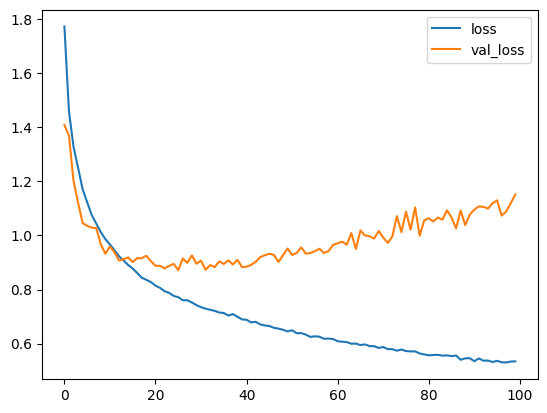

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss','val_loss'])
plt.figure()

In [ ]:
model.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7053 - loss: 1.1392


[1.1517587900161743, 0.7046999931335449]